<a href="https://colab.research.google.com/github/MaYuetong/MaYuetong/blob/main/Participants_visualization_IVETNET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas geopandas matplotlib plotly

# Step 2: 从Google Drive加载数据
from google.colab import drive
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# 挂载Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-5-d0f86e8e225f>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


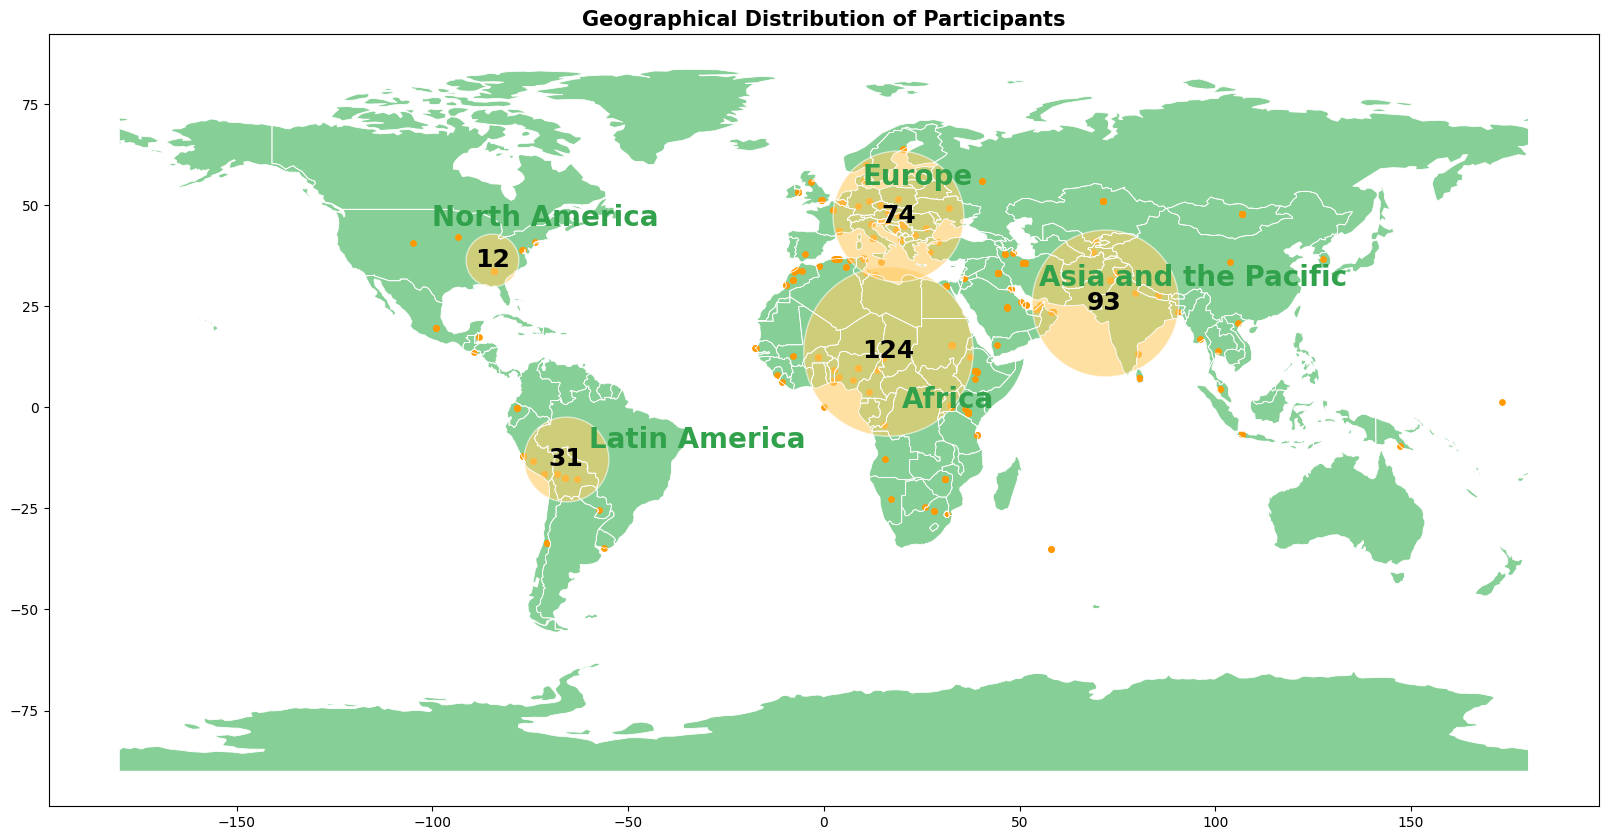

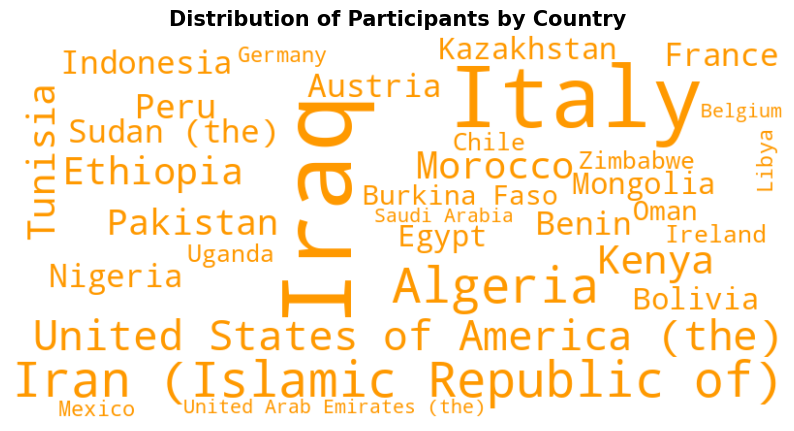

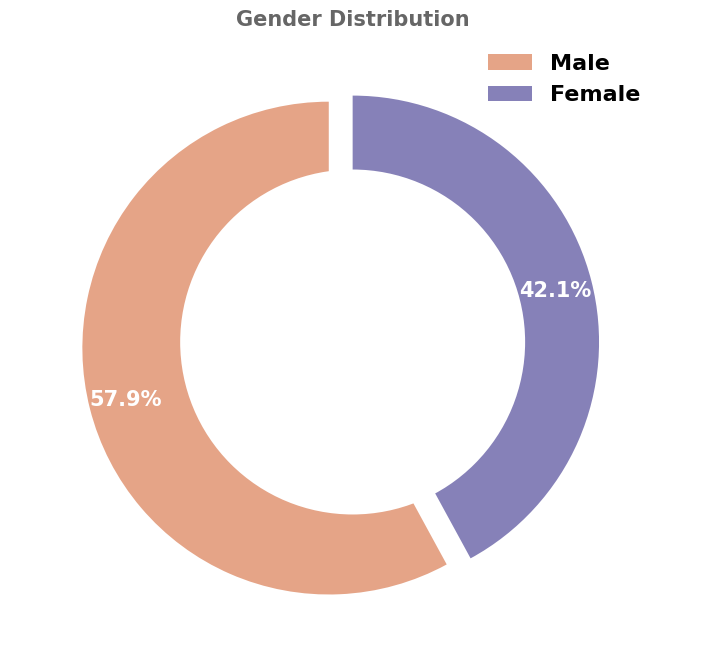

In [5]:
# Read the processed Excel file
file_path = '/content/drive/MyDrive/data/EventParticipantsNational.xlsx'
df = pd.read_excel(file_path)

# 1. Geographical Map using Geopandas with additional features
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Institution Longitude'], df['Institution Latitude']),
    crs="EPSG:4326"
)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

world.boundary.plot(ax=ax, linewidth=0.6, color='white')
world.plot(ax=ax, color='#86cf97')
gdf.plot(ax=ax, color='#ff9900', markersize=15)

# Define the coordinates for each region
continents = {
    'North America': (-100, 45),
    'Asia and the Pacific': (55, 30),
    'Europe': (10, 55),
    'Africa': (20, 0),
    'Latin America': (-60, -10)
}

for continent, (x, y) in continents.items():
    plt.text(x, y, continent, fontsize=20, color='#32a14c', weight='bold')

# Adding participant counts per region as bubbles
region_counts = df['Iaea Region Name'].value_counts()
for region, count in region_counts.items():
    region_data = df[df['Iaea Region Name'] == region]
    mean_lat = region_data['Institution Latitude'].mean()
    mean_lon = region_data['Institution Longitude'].mean()
    plt.scatter(mean_lon, mean_lat, s=count*120, alpha=0.6, color='#ffcc66', edgecolors='white')
    plt.text(mean_lon, mean_lat, str(count), fontsize=18, color='black', ha='center', va='center', weight='bold')

plt.title('Geographical Distribution of Participants', size=15, weight='bold')
plt.show()

# 2. Word Cloud for distribution of participants by country
from wordcloud import WordCloud

country_counts = df['Country Name'].value_counts()
wordcloud = WordCloud(width=800, height=400, background_color='white',
                      color_func=lambda *args, **kwargs: '#ff9900',
                      max_font_size=100, min_font_size=20).generate_from_frequencies(country_counts)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Distribution of Participants by Country',  size=15, weight='bold')
plt.show()

# 4. Pie Chart for gender distribution
gender_counts = df['Gender'].value_counts()

# Setting up the colors
colors = ['#e5a487', '#8681b8']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=['Male', 'Female'], autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, pctdistance=0.85, textprops={'fontsize': 15, 'fontweight': 'bold', 'color': 'white'})

# Draw center circle for 'donut' effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Gender Distribution', color='#666666',  size=15, weight='bold')

# Add legend
plt.legend(labels=['Male', 'Female'], loc="upper right", fontsize=16, frameon=False, prop={'size': 16, 'weight': 'bold'})

plt.show()

<ipython-input-7-16b77bf9cb54>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-7-16b77bf9cb54>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  world['centroid'] = world['geometry'].centroid


<ipython-input-7-16b77bf9cb54>:128: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
<ipython-input-7-16b77bf9cb54>:73: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


GEOSException: IllegalArgumentException: Points of LinearRing do not form a closed linestring

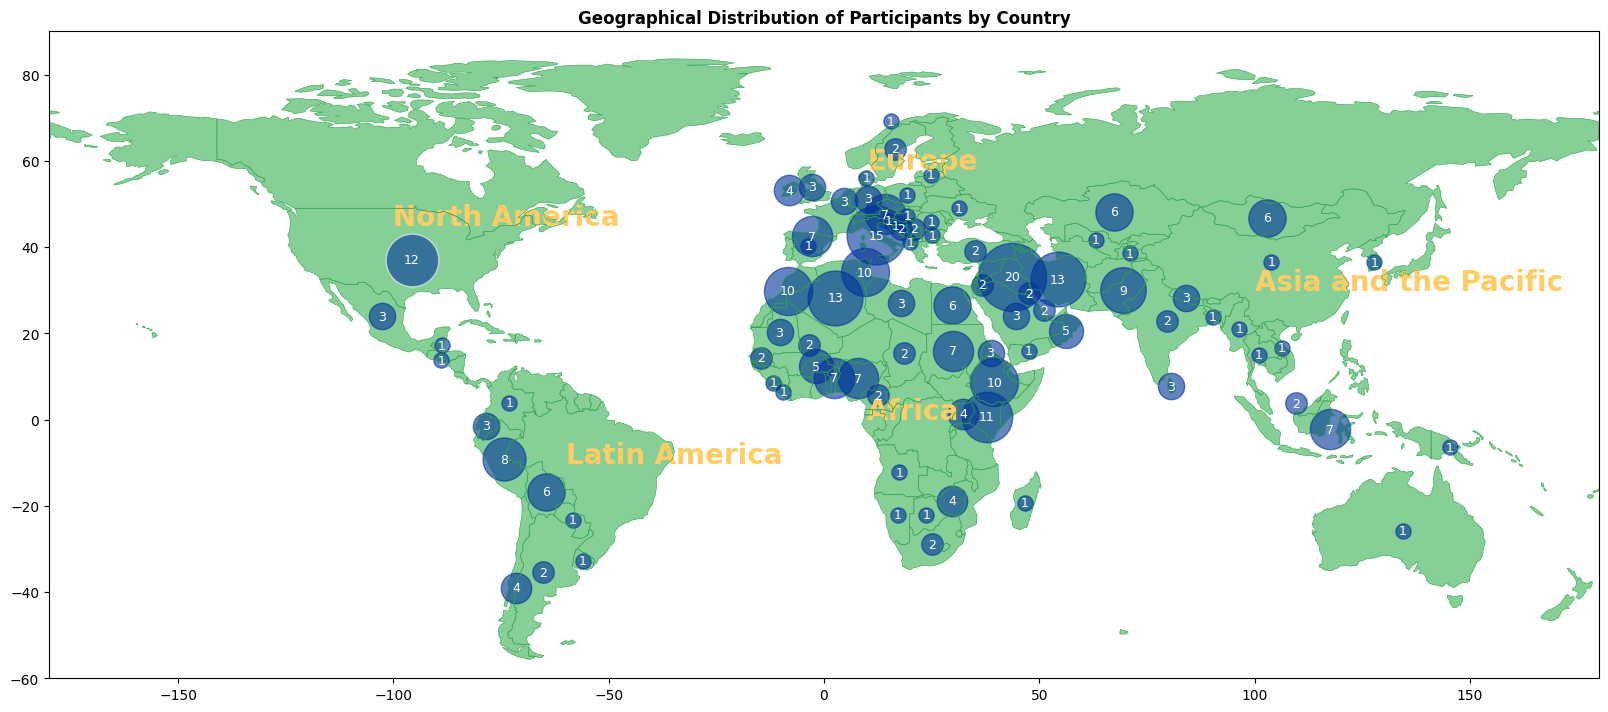

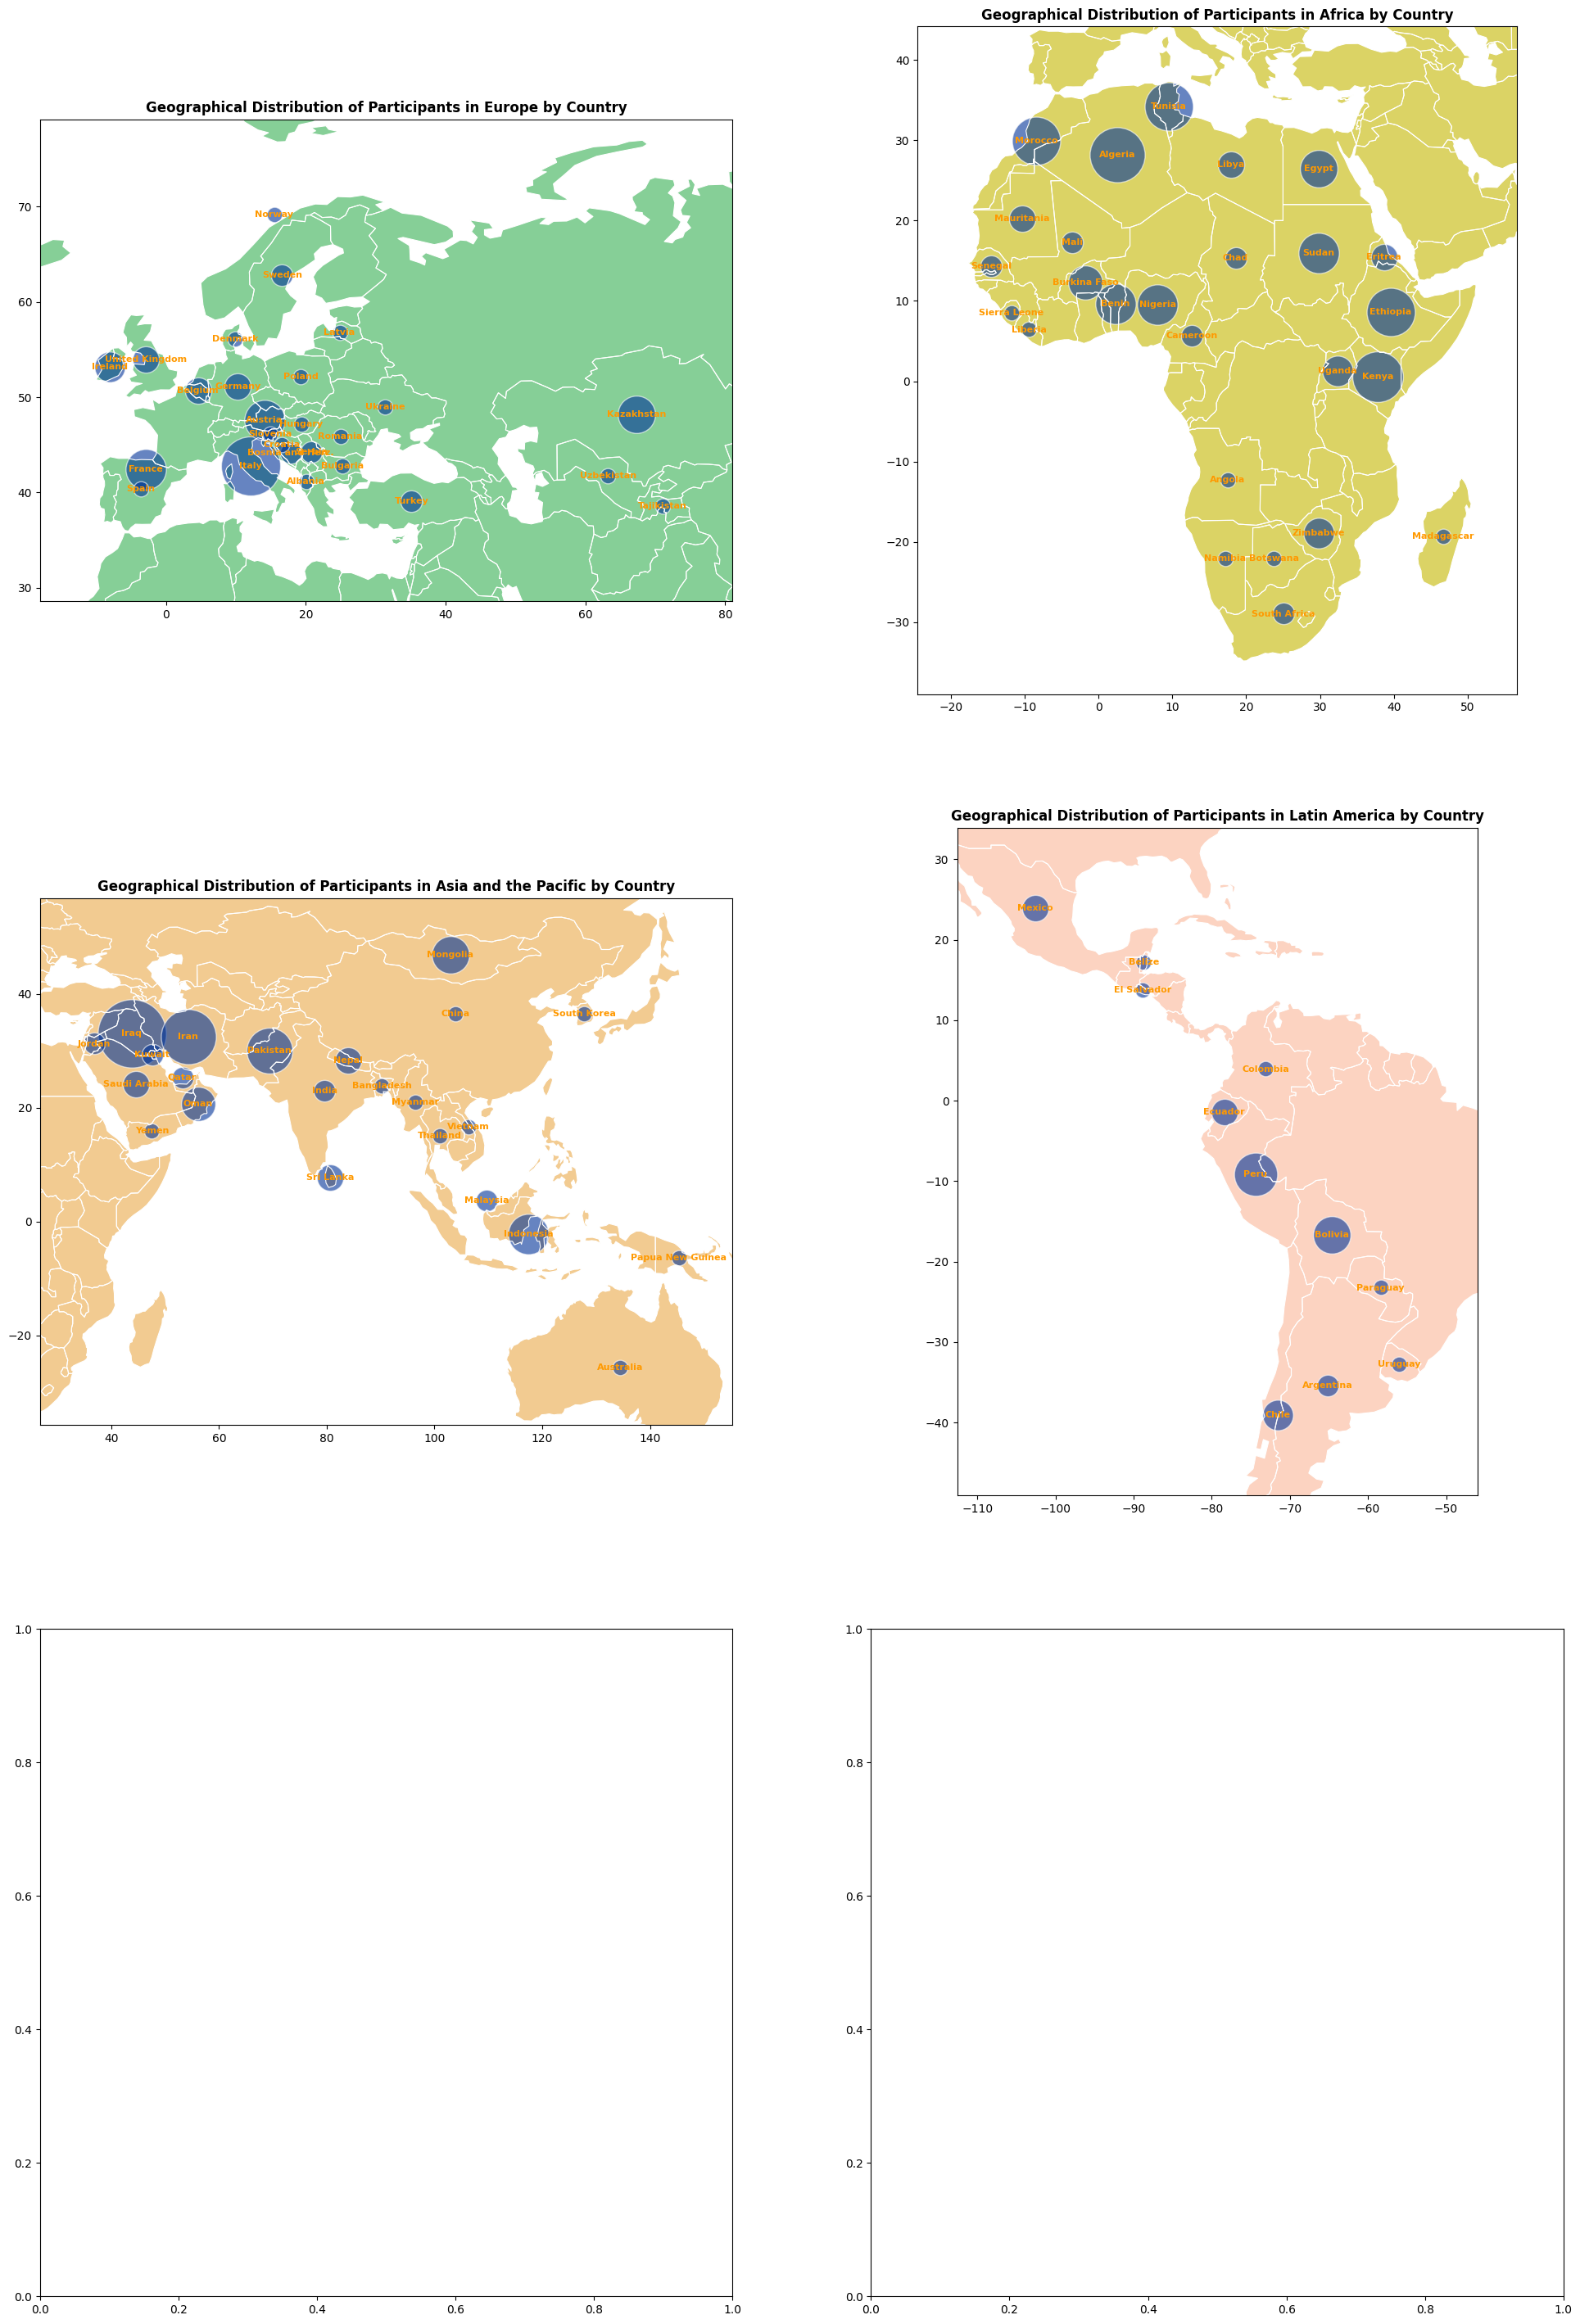

In [7]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# WGS84
world = world.to_crs("EPSG:4326")
world['centroid'] = world['geometry'].centroid


country_name_mapping = {
    'United States of America (the)': 'United States',
    'United Kingdom (the)': 'United Kingdom',
    'Sudan (the)': 'Sudan',
    'Iran (Islamic Republic of)': 'Iran',
    'Viet Nam': 'Vietnam',
    'Bosnia and Herzegovina': 'Bosnia and Herz.'
}

df['Country Name'] = df['Country Name'].replace(country_name_mapping)

def get_country_centroid(country_name, world):
    try:
        return world[world['name'] == country_name]['centroid'].values[0]
    except IndexError:
        print(f"Warning: {country_name} not found in world dataset")
        return None

df['country_centroid'] = df['Country Name'].apply(lambda x: get_country_centroid(x, world))


df['centroid_lon'] = df['country_centroid'].apply(lambda x: x.x if x else df[df['Country Name'] == x]['Institution Longitude'].mean())
df['centroid_lat'] = df['country_centroid'].apply(lambda x: x.y if x else df[df['Country Name'] == x]['Institution Latitude'].mean())


color_schemes = [
    ['#86cf97', '#32a14c'],  # Asia and the Pacific
    ['#dbd365', '#b9b029'],  # Africa
    ['#f2cb91', '#e3b161'],  # Europe
    ['#fcd3c1', '#e5a487'],  # Latin America
    ['#c7c4e2', '#8681b8'],  # North America
]

# 1
def plot_country_bubble_map(ax, df, title, world, continents):
    world.boundary.plot(ax=ax, linewidth=0.4, color='#32a14c')
    world.plot(ax=ax, color='#86cf97')

    country_counts = df['Country Name'].value_counts()
    for country, count in country_counts.items():
        country_data = df[df['Country Name'] == country]
        mean_lat = country_data['centroid_lat'].mean()
        mean_lon = country_data['centroid_lon'].mean()
        ax.scatter(mean_lon, mean_lat, s=count*120, alpha=0.6, color='#003399', edgecolors='#003399')
        ax.text(mean_lon, mean_lat, str(count), fontsize=9, color='white', ha='center', va='center')

    # 2
    us_count = 12
    us_lon, us_lat = -95.7129, 37.0902
    ax.scatter(us_lon, us_lat, s=us_count*120, alpha=0.6, color='#003399', edgecolors='white')
    ax.text(us_lon, us_lat, str(us_count), fontsize=9, color='white', ha='center', va='center')

    for continent, (x, y) in continents.items():
        ax.text(x, y, continent, fontsize=20, color='#ffcc66', weight='bold', zorder=1)

    ax.set_title(title, weight='bold')

#
def plot_region_bubble_maps(df, color_schemes):
    regions = df['Iaea Region Name'].unique()
    regions = [region for region in regions if region != '']
    num_regions = len(regions)
    fig, axes = plt.subplots((num_regions + 1) // 2, 2, figsize=(24, (num_regions + 1) // 2 * 12))
    axes = axes.flatten()

    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    for i, (region, colors) in enumerate(zip(regions, color_schemes)):
        region_df = df[df['Iaea Region Name'] == region]

        if region == 'Europe':
            buffer = 10
        elif region == 'Asia and the Pacific':
            buffer = 15
        elif region == 'North America':
            buffer = 20
        else:
            buffer = 5

        region_world = world.cx[region_df['centroid_lon'].min()-20:region_df['centroid_lon'].max()+20,
                                region_df['centroid_lat'].min()-20:region_df['centroid_lat'].max()+20]

        axes[i].set_xlim(region_df['centroid_lon'].min()-10, region_df['centroid_lon'].max()+10)
        axes[i].set_ylim(region_df['centroid_lat'].min()-10, region_df['centroid_lat'].max()+10)

        region_world.boundary.plot(ax=axes[i], linewidth=0.8, color='white')
        region_world.plot(ax=axes[i], color=colors[0])

        region_country_counts = region_df['Country Name'].value_counts()
        for country, count in region_country_counts.items():
            country_data = region_df[region_df['Country Name'] == country]
            mean_lat = country_data['centroid_lat'].mean()
            mean_lon = country_data['centroid_lon'].mean()


            if region == 'Europe' and country in ['Bosnia and Herzegovina']:
                continue

            # move Qatar
            if country == 'Qatar':
                mean_lon += 2

            axes[i].scatter(mean_lon, mean_lat, s=count*180, alpha=0.6, color='#003399', edgecolors='white')
            axes[i].text(mean_lon, mean_lat, country, fontsize=8, color='#ff9900',weight='bold',ha='center', va='center')

        #North America
        if region == 'North America':
            us_lon, us_lat = -95.7129, 37.0902
            axes[i].scatter(us_lon, us_lat, s=12*180, alpha=0.6, color='#003399', edgecolors='#003399')
            axes[i].text(us_lon, us_lat, 'United States', fontsize=9, color='black', ha='center', va='center')

        axes[i].set_title(f'Geographical Distribution of Participants in {region} by Country',  weight='bold')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

fig, ax = plt.subplots(1, 1, figsize=(20, 12))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax.set_xlim(-180, 180)
ax.set_ylim(-60, 90)

continents = {
    'North America': (-100, 45),
    'Asia and the Pacific': (100, 30),
    'Europe': (10, 58),
    'Africa': (10, 0),
    'Latin America': (-60, -10)
}

plot_country_bubble_map(ax, df, 'Geographical Distribution of Participants by Country', world, continents)


plot_region_bubble_maps(df, color_schemes)

<ipython-input-8-4eb3121bab50>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


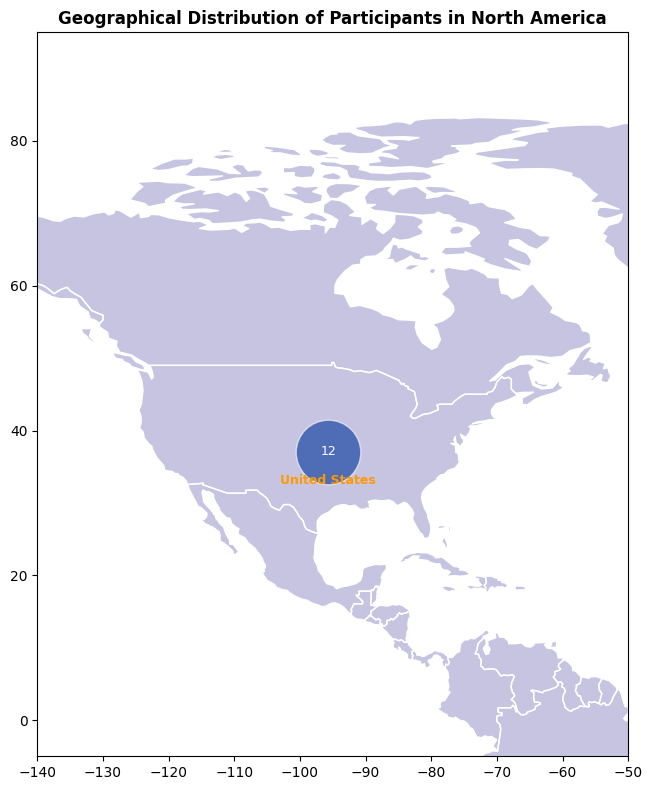

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.to_crs("EPSG:4326")


na_color_scheme = ['#c7c4e2','#8681b8']


def plot_north_america_map():
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    buffer = 20

    north_america_world = world.cx[-170:-30, 5:85]

    ax.set_xlim(-130-buffer/2, -60+buffer/2)
    ax.set_ylim(5-buffer/2, 85+buffer/2)

    north_america_world.boundary.plot(ax=ax, linewidth=1, color='white')
    north_america_world.plot(ax=ax, color=na_color_scheme[0])


    us_lon, us_lat = -95.7129, 37.0902
    count = 12
    ax.scatter(us_lon, us_lat, s=count*180, alpha=0.6, color='#003399', edgecolors='white')
    ax.text(us_lon, us_lat, str(count), fontsize=9, color='white', ha='center', va='center')
    ax.text(us_lon, us_lat - 4, 'United States', fontsize=9, color='#ff9900',weight='bold', ha='center', va='center')

    ax.set_title('Geographical Distribution of Participants in North America', weight='bold')

    plt.tight_layout()
    plt.show()

plot_north_america_map()


In [9]:
!pip install pandas geopandas plotly matplotlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# Assuming the Excel file is named 'Event_Participants.xlsx' and contains sheets 'Event_Details' and 'Participants'
file_path = '/path/to/Event_Participants.xlsx'


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/Event_Participants.xlsx'

<ipython-input-25-a8ff05cbd987>:22: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

<ipython-input-25-a8ff05cbd987>:24: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-25-a8ff05cbd987>:57: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



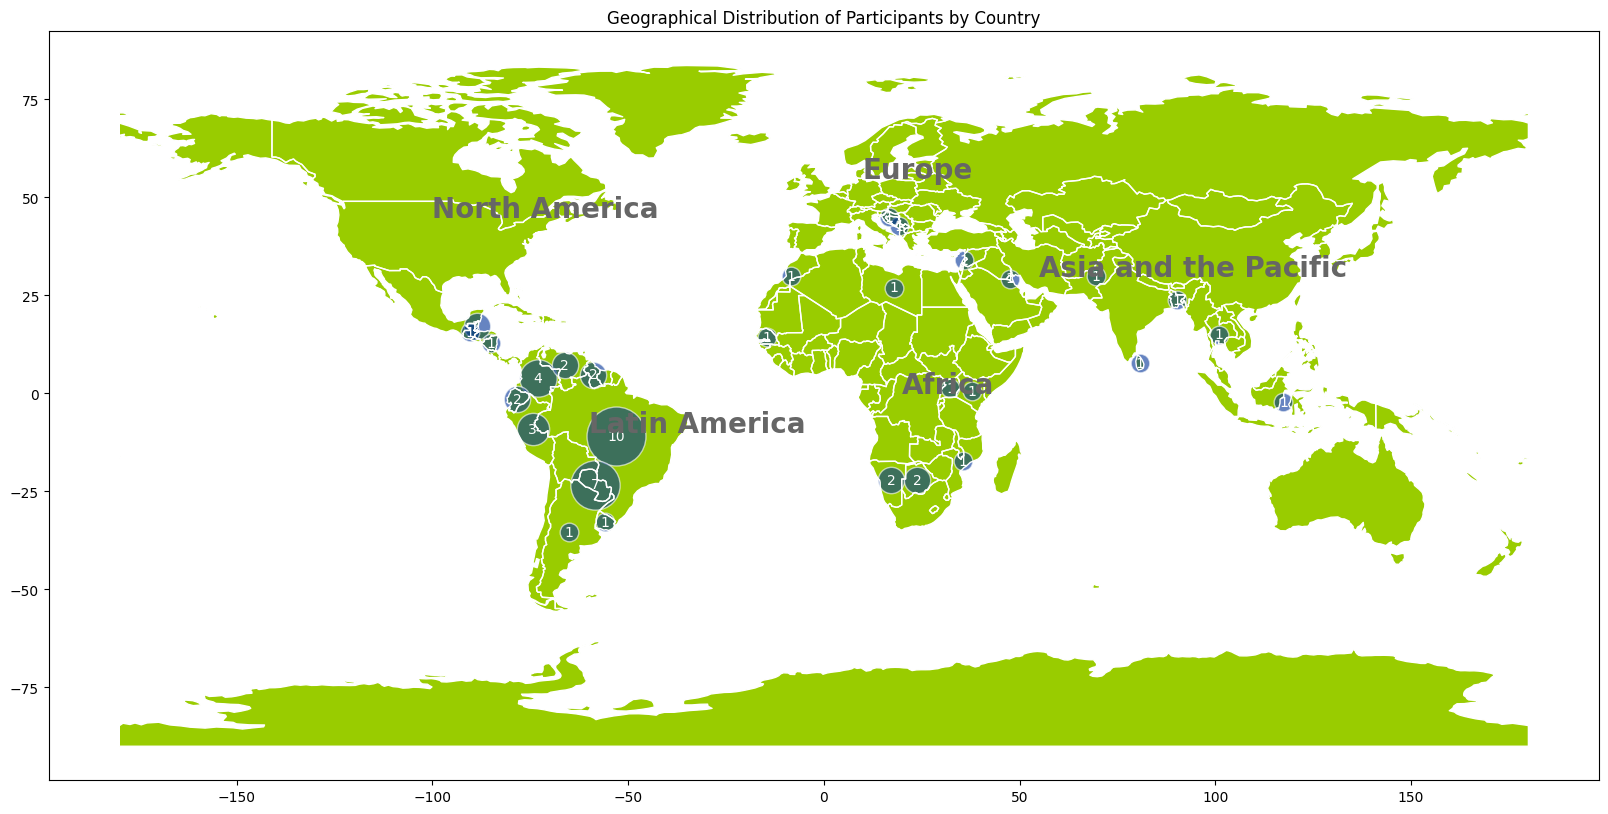

In [25]:
# 1. 加载数据
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# 读取Excel文件
file_path = '/content/drive/MyDrive/data/EventParticipantsInterregional.xlsx'
df = pd.read_excel(file_path)

# 颜色搭配
color_schemes = [
    ['#32a14c', '#86cf97'],
    ['#b9b029', '#dbd365'],
    ['#e3b161', '#f2cb91'],
    ['#e5a487', '#fcd3c1'],
    ['#8681b8', '#c7c4e2']
]

# 获取国家的几何中心
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.to_crs("EPSG:4326")  # 确保使用WGS84坐标系
world['centroid'] = world['geometry'].centroid

# 为数据框中的每个国家分配几何中心
df['country_centroid'] = df['Country Name'].map(lambda x: world[world['name'] == x]['centroid'].values[0] if x in world['name'].values else None)

# 将几何中心分为经度和纬度
df['centroid_lon'] = df['country_centroid'].apply(lambda x: x.x if x else None)
df['centroid_lat'] = df['country_centroid'].apply(lambda x: x.y if x else None)

# Step 3: 可视化

# 1. Map with country-level participant bubbles
def plot_country_bubble_map(ax, df, title, world, continents):
    world.boundary.plot(ax=ax, linewidth=1, color='white')
    world.plot(ax=ax, color='#99cc00')  # 陆地填充颜色

    country_counts = df['Country Name'].value_counts()
    for country, count in country_counts.items():
        country_data = df[df['Country Name'] == country]
        mean_lat = country_data['centroid_lat'].mean()
        mean_lon = country_data['centroid_lon'].mean()
        ax.scatter(mean_lon, mean_lat, s=count*180, alpha=0.6, color='#003399', edgecolors='white')
        ax.text(mean_lon, mean_lat, str(count), fontsize=10, color='white', ha='center', va='center', fontname='Microsoft YaHei')

    for continent, (x, y) in continents.items():
        ax.text(x, y, continent, fontsize=20, color='#666666', weight='bold', fontname='Microsoft YaHei')

    ax.set_title(title, fontname='Microsoft YaHei')



# 世界地图
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

continents = {
    'North America': (-100, 45),
    'Asia and the Pacific': (55, 30),
    'Europe': (10, 55),
    'Africa': (20, 0),
    'Latin America': (-60, -10)
}

plot_country_bubble_map(ax, df, 'Geographical Distribution of Participants by Country', world, continents)




In [26]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd

# Sample data provided (reduced for brevity)
data = [
    [1050, "Central Veterinary Laboratory (LAVECEN)", "Ave. Monumental #52, Los Girasoles", "Santo Domingo", "Dominican Republic", "Latin America", "SEGURA MANZUETA Alicia Elysse", "Female", "", "3. Regular participant", "aliciasegura@lavecen.gob.do", 18.519057, -69.989034, 18.46261, -69.9361],
    [1444, "National Biosecurity Agency (NBA);Veterinary Department", "Orion Mall Building; Palm Street; P.O. Box 464", "Victoria, Mahé", "Seychelles", "Africa", "JOUBERT Shariffa", "Female", "1989/12/10", "3. Regular participant", "alli.saila10@gmail.com", -4.613779, 55.457013, -4.623007, 55.455095],
    # ... more data ...
]

# Convert data to DataFrame
columns = ["Institution ID", "Institution Name", "Address", "Place", "Country Name", "Region", "Participant Name", "Gender", "Birthdate", "Participation Type", "Email", "Latitude", "Longitude", "Alt Latitude", "Alt Longitude"]
df = pd.DataFrame(data, columns=columns)

# Bubble Plot
country_counts = df['Country Name'].value_counts().reset_index()
country_counts.columns = ['Country Name', 'Participant Count']

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(country_counts, how="left", left_on="name", right_on="Country Name")

fig_bubble = px.scatter_geo(merged,
                            locations="iso_a3",
                            size="Participant Count",
                            hover_name="Country Name",
                            hover_data={"Participant Count": True},
                            projection="natural earth",
                            title="Participants by Country")

# Add participant count text to bubbles
for i, row in merged.iterrows():
    if pd.notna(row['Participant Count']):
        fig_bubble.add_annotation(
            x=row['geometry'].centroid.x,
            y=row['geometry'].centroid.y,
            text=str(int(row['Participant Count'])),
            showarrow=False,
            font=dict(size=10, color="white")
        )

fig_bubble.show()

# Horizontal Bar Chart
region_counts = df.groupby(['Region', 'Gender']).size().unstack().fillna(0)
region_counts['Total'] = region_counts.sum(axis=1)
region_counts = region_counts.sort_values('Total', ascending=False)

fig_hbar = go.Figure()
fig_hbar.add_trace(go.Bar(
    y=region_counts.index,
    x=region_counts['Female'],
    name='Female',
    orientation='h'
))
fig_hbar.add_trace(go.Bar(
    y=region_counts.index,
    x=region_counts['Male'],
    name='Male',
    orientation='h'
))

fig_hbar.update_layout(
    title="Participants by Region and Gender",
    barmode='stack',
    xaxis_title="Number of Participants",
    yaxis_title="Region"
)

fig_hbar.show()

# Pie Chart
gender_counts = df['Gender'].value_counts()

fig_pie = px.pie(values=gender_counts.values, names=gender_counts.index, title="Gender Distribution of Participants")
fig_pie.show()

# Vertical Bar Chart
country_counts_sorted = country_counts.sort_values('Participant Count', ascending=False)

fig_vbar = px.bar(country_counts_sorted, x='Country Name', y='Participant Count', title="Participants by Country", labels={'Country Name': 'Country', 'Participant Count': 'Number of Participants'})
fig_vbar.show()


<ipython-input-26-b4593e88b752>:21: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above